# Proyecto de Modelado y Minería de Datos
Este notebook es una plantilla básica para comenzar un flujo de trabajo en minería de datos y modelado.

## Instalación de las bibliotecas necesarias

In [1]:
!pip install numpy
!pip install pandas matplotlib
!pip install pygwalker


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pygwalker-0.4.9.15-py3-none-any.whl.metadata (20 kB)
  Using cached anywidget-0.9.18-py3-none-any.whl.metadata (8.9 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached cachetools-6.2.1-py3-none-any.whl.metadata (5.5 kB)
  Using cached duckdb-1.4.1-cp313-cp313-win_amd64.whl.metadata (14 kB)
  Using cached gw_dsl_parser-0.1.49.1-py3-none-any.whl.metadata (1.2 kB)
  Using cached ipylab-1.0.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached kanaries_track-0.0.5-py3-none-any.whl.metadata (913 bytes)
  Using cached pyarrow-22.0.0-cp313-cp313-win_amd64.whl.metadata (3.3 kB)
  Using cached pydantic-2.12.3-py3-none-any.whl.metadata (87 kB)
  Using cached quickjs-1.19.4.tar.gz (456 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started

  error: subprocess-exited-with-error
  
  × Building wheel for quickjs (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-313\quickjs
      copying quickjs\__init__.py -> build\lib.win-amd64-cpython-313\quickjs
      running build_ext
      building '_quickjs' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for quickjs

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
error: failed-wheel-build-for-install

× Failed to build installable wheels for some pyproject.toml based projects
╰─> quickjs


In [2]:
import pandas as pd
import pygwalker as pyg
import matplotlib.pyplot as plt
import itertools #para crear las paletas de colores de los graficos
import matplotlib.ticker as mtick

#Para evitar que los números grandes se vean con notación científica
pd.set_option('display.float_format', '{:,.2f}'.format)

ModuleNotFoundError: No module named 'pygwalker'

## Leer los archivos CSV

In [ ]:
# Leer los archivos correctos
productos = pd.read_csv('/content/drive/MyDrive/CDIA/MineriaDeDatos/TrabajoBasesDatos/TP3/productos.csv')
rubros = pd.read_csv('/content/drive/MyDrive/CDIA/MineriaDeDatos/TrabajoBasesDatos/TP3/rubros.csv')
clientes = pd.read_csv('/content/drive/MyDrive/CDIA/MineriaDeDatos/TrabajoBasesDatos/TP3/clientes.csv')
facturas_encabezados = pd.read_csv('/content/drive/MyDrive/CDIA/MineriaDeDatos/TrabajoBasesDatos/TP3/facturas_encabezados_simulados.csv')
facturas_detalles = pd.read_csv('/content/drive/MyDrive/CDIA/MineriaDeDatos/TrabajoBasesDatos/TP3/facturas_detalles_simulados.csv')
ventas = pd.read_csv('/content/drive/MyDrive/CDIA/MineriaDeDatos/TrabajoBasesDatos/TP3/ventas_simuladas.csv')

#display(ventas)
#display(facturas_encabezados)
#print("Columnas en ventas:", ventas.columns)
#print("Columnas en facturas_encabezados:", facturas_encabezados.columns)

print("¡Archivos CSV cargados correctamente!")

¡Archivos CSV cargados correctamente!


## Unificar facturas con clientes y ventas

In [ ]:
# Unificar facturas con clientes y ventas:
ventas_clientes = pd.merge(ventas, facturas_encabezados, on='id_factura', how='left')
print(ventas_clientes.columns)
ventas_clientes = pd.merge(ventas_clientes, clientes, on='id_cliente', how='left')
print(ventas_clientes.columns)

Index(['id_venta', 'id_factura', 'monto', 'numero', 'fecha', 'condicion_IVA',
       'id_sucursal', 'id_cliente'],
      dtype='object')
Index(['id_venta', 'id_factura', 'monto', 'numero', 'fecha', 'condicion_IVA',
       'id_sucursal', 'id_cliente', 'nombre', 'id_localidad', 'domicilio'],
      dtype='object')


## Modificar los nombres de las columnas para que sean las correctas
El nombre de las columnas nombre y monto no coincidian con el resto del código. Se corre un código para modificar esto.

In [ ]:
ventas_clientes = ventas_clientes.rename(columns={
    'nombre': 'nombre_cliente',
    'monto': 'total_venta'
})
display(ventas_clientes[['id_factura','fecha','nombre_cliente','total_venta']].head())

,id_factura,fecha,nombre_cliente,total_venta
0,1,04/09/2025,Ana Gómez,1309500
1,2,04/09/2025,Luis Martínez,574000
2,3,04/09/2025,María Fernández,218000
3,4,04/09/2025,Carlos Pérez,108000
4,5,04/09/2025,Lucía Rodríguez,119000


## Ranking de clientes por total de ventas:

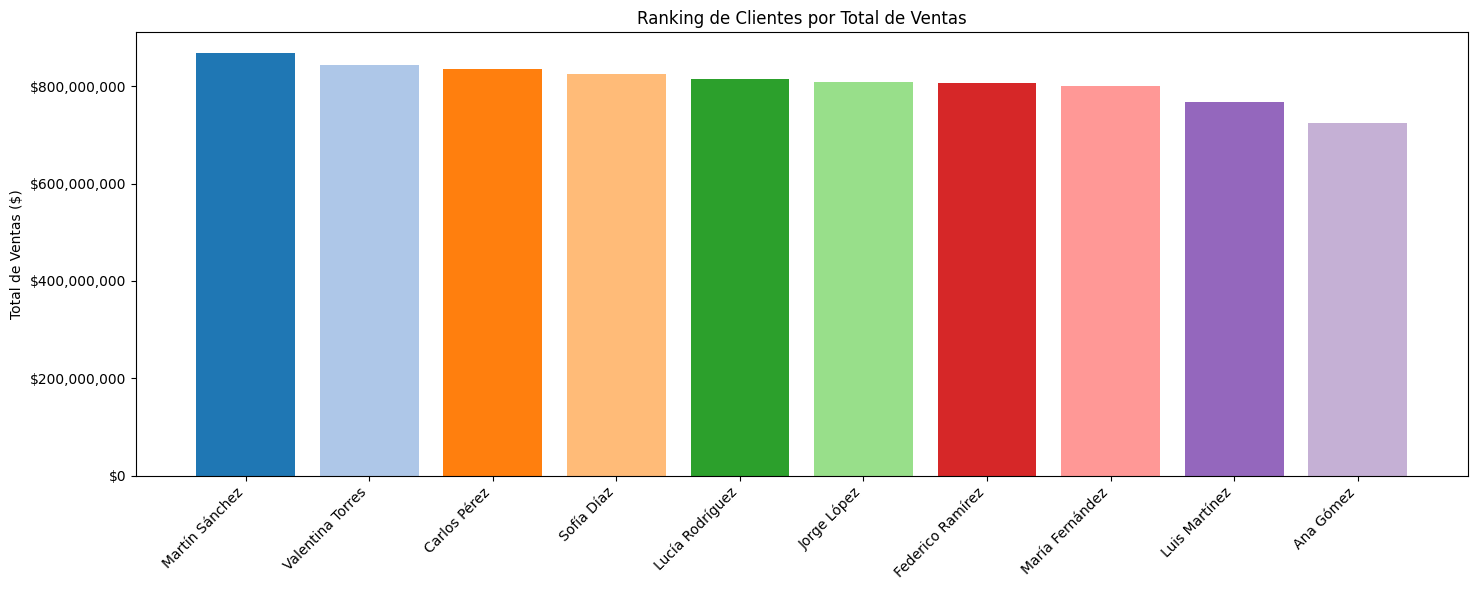

In [ ]:
import matplotlib.ticker as mtick
import itertools

ranking_clientes = ventas_clientes.groupby('nombre_cliente')['total_venta'].sum().reset_index()
ranking_clientes = ranking_clientes.sort_values(by='total_venta', ascending=False)

# Crear una paleta de colores única
num_clientes = len(ranking_clientes)
base_colors = plt.cm.tab20.colors  # Paleta con hasta 20 colores distintos
colors = list(itertools.islice(itertools.cycle(base_colors), num_clientes))

# Crear el gráfico
plt.figure(figsize=(14, 6))
plt.bar(ranking_clientes['nombre_cliente'], ranking_clientes['total_venta'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total de Ventas ($)')
plt.title('Ranking de Clientes por Total de Ventas')
plt.tight_layout()

# Format Y-axis as Argentine Pesos
formatter = mtick.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

## Ticket promedio por cliente

In [ ]:
ticket_promedio = ventas_clientes.groupby('nombre_cliente')['total_venta'].mean().reset_index()
ticket_promedio.rename(columns={'total_venta': 'ticket_promedio'}, inplace=True)
display(ticket_promedio.sort_values(by='ticket_promedio', ascending=False))

,nombre_cliente,ticket_promedio
7,María Fernández,"1,180,937.41"
1,Carlos Pérez,"1,174,597.05"
9,Valentina Torres,"1,158,152.47"
6,Martín Sánchez,"1,155,625.17"
3,Jorge López,"1,136,263.34"
8,Sofía Díaz,"1,111,703.50"
4,Lucía Rodríguez,"1,111,386.08"
5,Luis Martínez,"1,110,968.93"
2,Federico Ramírez,"1,083,570.47"
0,Ana Gómez,"1,008,279.25"


## Facturas más altas

In [ ]:
top_facturas = ventas_clientes.sort_values(by='total_venta', ascending=False).head(5)
display(top_facturas)

,id_venta,id_factura,total_venta,numero,fecha,condicion_IVA,id_sucursal,id_cliente,nombre_cliente,id_localidad,domicilio
4846,4847,4847,6170000,F-0001-00004847,2024-11-15,Consumidor Final,1,10,Federico Ramírez,10,Castelli 707
3814,3815,3815,6146000,F-0001-00003815,2024-06-20,Consumidor Final,1,2,Luis Martínez,2,Av. Siempreviva 456
2481,2482,2482,5810000,F-0001-00002482,2023-12-13,Consumidor Final,1,10,Federico Ramírez,10,Castelli 707
4840,4841,4841,5720000,F-0001-00004841,2024-11-15,Consumidor Final,1,5,Lucía Rodríguez,5,Belgrano 202
1823,1824,1824,5656000,F-0001-00001824,2023-09-13,Consumidor Final,1,1,Ana Gómez,1,Calle Falsa 123


## Análisis ventas mensuales

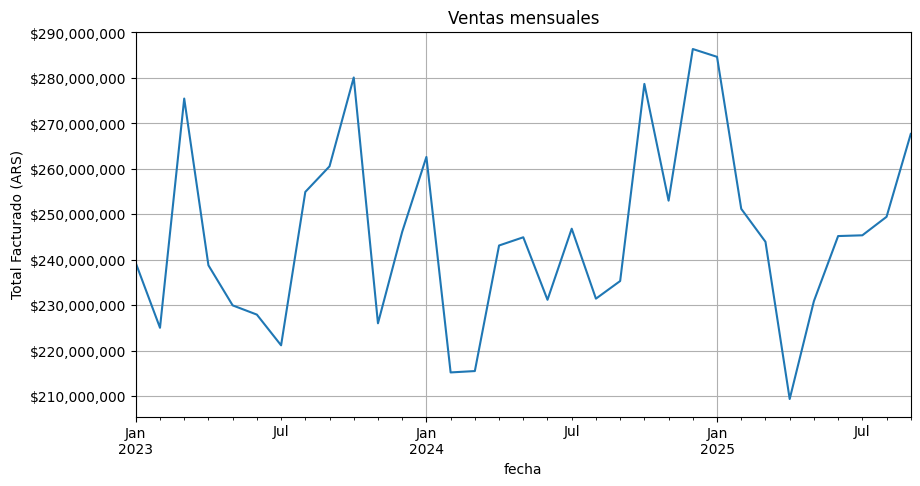

In [ ]:
ventas_clientes['fecha'] = pd.to_datetime(ventas_clientes['fecha'], format='%d/%m/%Y') #se agrego 'format='%d/%m/%Y' para hacerlo compatible con Pandas
ventas_por_mes = ventas_clientes.groupby(ventas_clientes['fecha'].dt.to_period('M'))['total_venta'].sum().reset_index(name='total_venta')

ventas_por_mes.set_index('fecha', inplace=True)
# colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'purple', 'gold', 'cyan'] # Define a list of colors
ventas_por_mes['total_venta'].plot(kind='line', figsize=(10,5)) # Change to line plot and remove colors as they are not needed for a single line
plt.title('Ventas mensuales')
plt.ylabel('Total Facturado (ARS)') # Update label
plt.grid(True) # Add grid for better readability of line plot

# Format Y-axis as Argentine Pesos
formatter = mtick.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

## Análisis ventas semanales de Septiembre

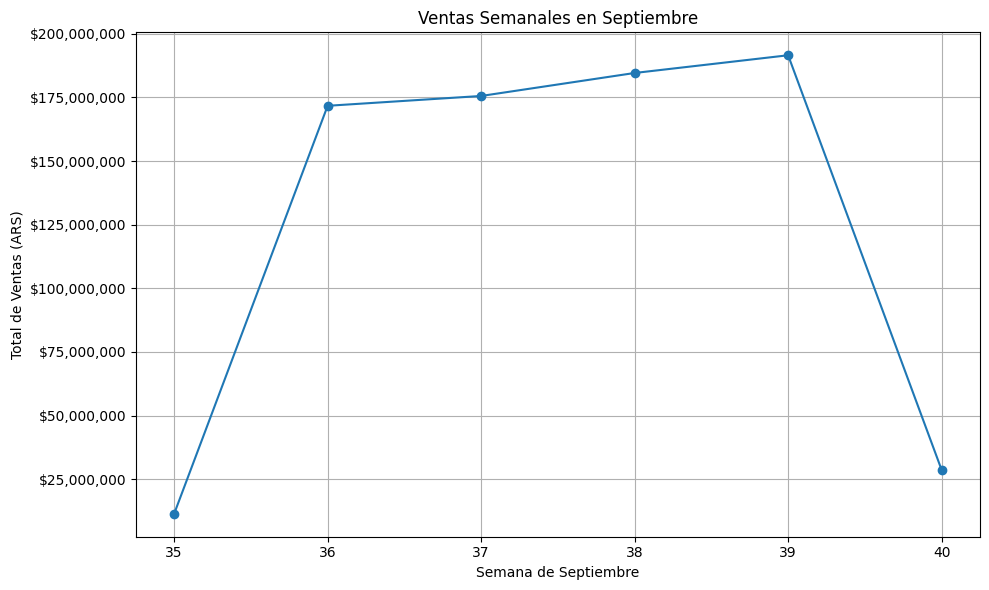

In [ ]:
import matplotlib.ticker as mtick

# Filter for September data
septiembre_ventas = ventas_clientes[ventas_clientes['fecha'].dt.month == 9].copy()

# Group by week and sum total_venta
ventas_semanales_septiembre = septiembre_ventas.groupby(septiembre_ventas['fecha'].dt.isocalendar().week)['total_venta'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ventas_semanales_septiembre['week'], ventas_semanales_septiembre['total_venta'], marker='o', linestyle='-')
plt.xlabel('Semana de Septiembre')
plt.ylabel('Total de Ventas (ARS)')
plt.title('Ventas Semanales en Septiembre')
plt.grid(True)
plt.xticks(ventas_semanales_septiembre['week']) # Ensure all weeks are shown on the x-axis

# Format Y-axis as Argentine Pesos
formatter = mtick.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

## Producto más vendido en cantidad:

In [ ]:
productos_vendidos=facturas_detalles.groupby('id_producto')['cantidad'].sum().reset_index()
productos_vendidos = pd.merge(productos_vendidos, productos, on='id_producto')
display(productos_vendidos.sort_values(by='cantidad', ascending=False).head(1))

,id_producto,cantidad,descripcion,precio,id_proveedor,id_rubro,stock
7,8,3728,Parlantes Logitech Z313,32000,3,3,10


## Ventas totales por rubro:

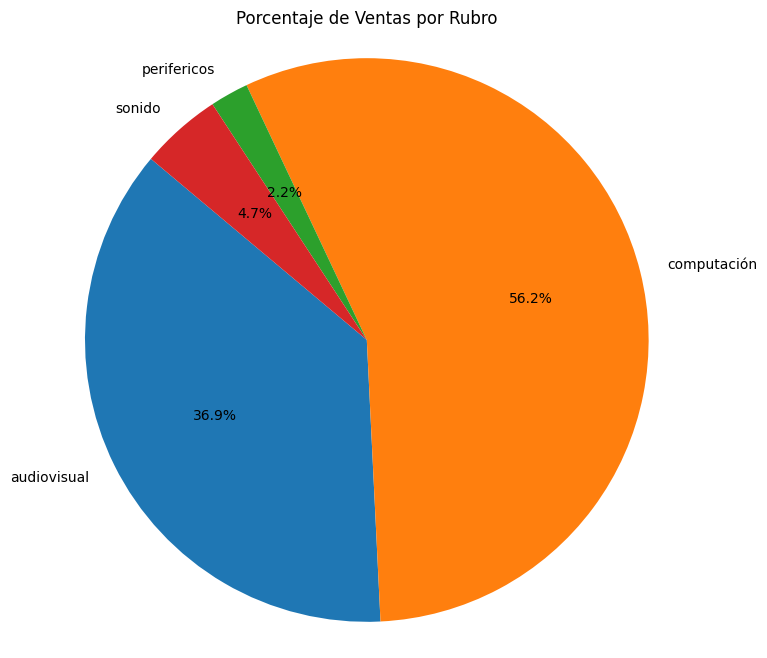

In [ ]:
# Calculate total sales amount for each rubro
ventas_por_rubro_importe = detalle_rubro.groupby('nombre_rubro')['importe'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_rubro_importe['importe'], labels=ventas_por_rubro_importe['nombre_rubro'], autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Ventas por Rubro')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Top productos por facturación:



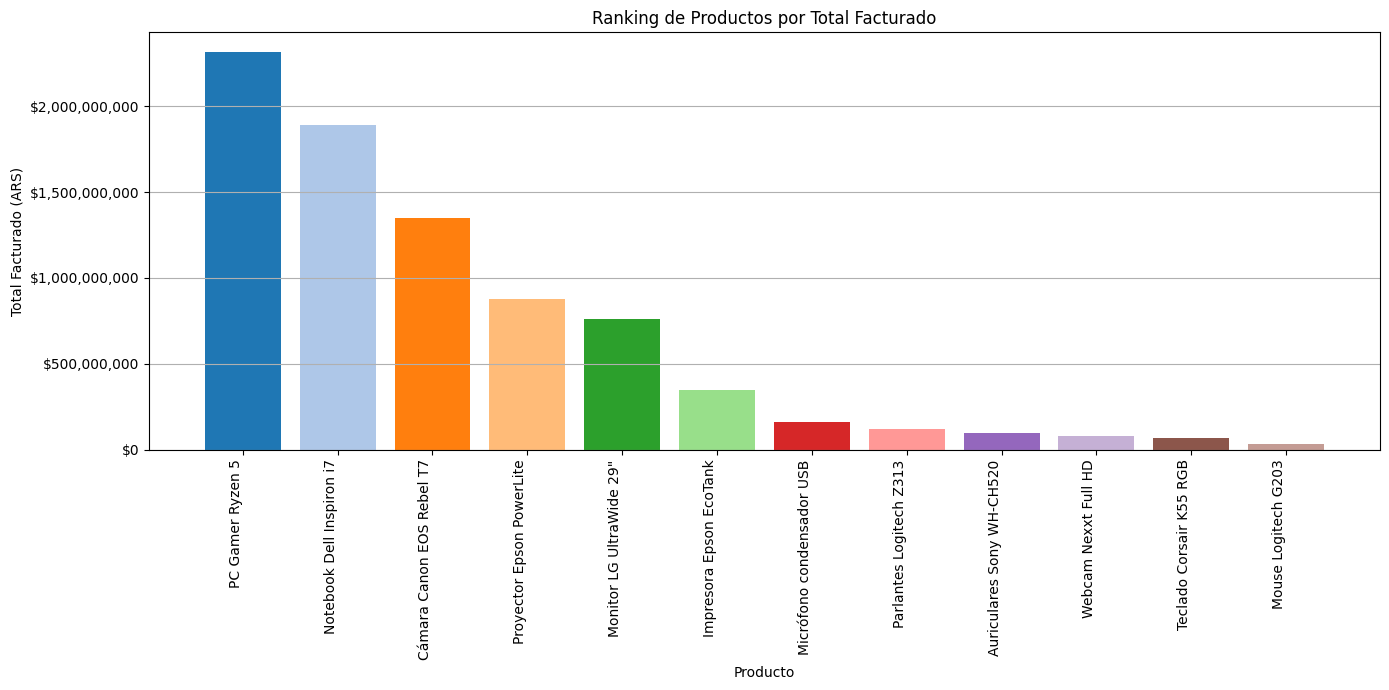

In [ ]:
detalle_con_precio = pd.merge(facturas_detalles, productos, on='id_producto')
detalle_con_precio['importe'] = detalle_con_precio['cantidad'] * detalle_con_precio['precio'] # Use 'precio' column for total sales calculation
ranking_productos = detalle_con_precio.groupby('descripcion')['importe'].sum().reset_index()

# Sort by total revenue
ranking_productos = ranking_productos.sort_values(by='importe', ascending=False)

# Create a unique color palette for the bars
num_productos = len(ranking_productos)
base_colors = plt.cm.tab20.colors  # Using tab20 for up to 20 distinct colors
colors = list(itertools.islice(itertools.cycle(base_colors), num_productos))

# Create the bar chart
plt.figure(figsize=(14, 7))
plt.bar(ranking_productos['descripcion'], ranking_productos['importe'], color=colors)
plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for readability
plt.xlabel('Producto')
plt.ylabel('Total Facturado (ARS)')
plt.title('Ranking de Productos por Total Facturado')
plt.grid(axis='y') # Add horizontal grid lines

# Format Y-axis as Argentine Pesos
formatter = mtick.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

## Matriz BCG (Bonstón Consulting Group)

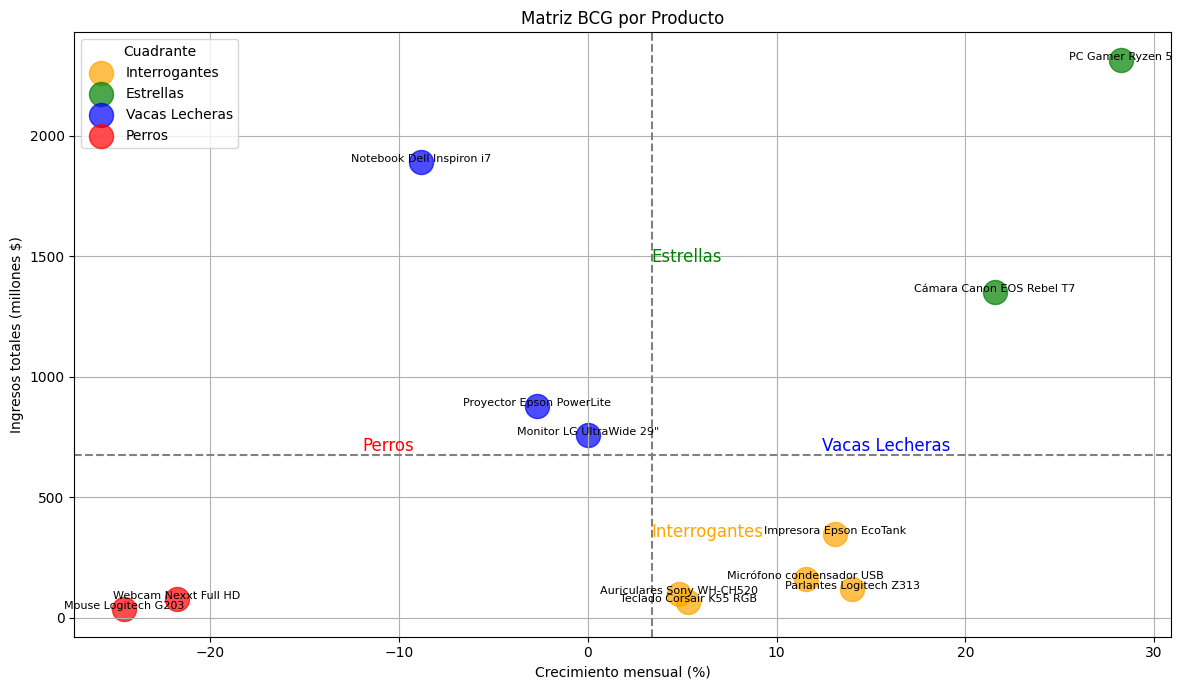

In [ ]:
# Paso 1: Unir detalles con productos
detalle = pd.merge(facturas_detalles, productos, on='id_producto')

# Merge with facturas_encabezados to get the 'fecha' column
detalle = pd.merge(detalle, facturas_encabezados[['id_factura', 'fecha']], left_on='id_facturaENC', right_on='id_factura', how='left')
detalle = detalle.drop(columns=['id_factura']) # Drop the redundant column after merging

# Convert 'fecha' to datetime and extract month
detalle['fecha'] = pd.to_datetime(detalle['fecha'], format='%d/%m/%Y')
detalle['mes'] = detalle['fecha'].dt.to_period('M')

# Paso 2: Calcular ingresos por producto
detalle['importe'] = detalle['cantidad'] * detalle['precio_unitario']

# Paso 3: Agrupar por producto y mes
ingresos_mes = detalle.groupby(['descripcion', 'mes'])['importe'].sum().reset_index()

# Paso 4: Pivot para comparar crecimiento entre meses
pivot = ingresos_mes.pivot(index='descripcion', columns='mes', values='importe').fillna(0)

# Convert month periods to strings for plotting
pivot.columns = pivot.columns.astype(str)

# Paso 5: Calculate growth and total income
pivot['ingresos_totales'] = pivot.sum(axis=1)
pivot['crecimiento'] = 0.0  # Initialize growth column

# Calculate growth for products with at least two months of data
for index, row in pivot.iterrows():
    monthly_sales = row.drop('ingresos_totales') # Exclude total income column
    monthly_sales = monthly_sales[monthly_sales > 0] # Consider only months with sales
    if len(monthly_sales) >= 2:
        # Calculate growth based on the last two months with sales
        last_month_sales = monthly_sales.iloc[-1]
        second_last_month_sales = monthly_sales.iloc[-2]
        pivot.loc[index, 'crecimiento'] = last_month_sales / (second_last_month_sales + 1e-6) - 1

# Calculate averages for quadrant lines
avg_income = pivot['ingresos_totales'].mean()
avg_growth = pivot['crecimiento'].mean()

# Define quadrant labels and colors
def assign_quadrant(row):
    if row['crecimiento'] > avg_growth and row['ingresos_totales'] > avg_income:
        return 'Estrellas', 'green'
    elif row['crecimiento'] <= avg_growth and row['ingresos_totales'] > avg_income:
        return 'Vacas Lecheras', 'blue'
    elif row['crecimiento'] > avg_growth and row['ingresos_totales'] <= avg_income:
        return 'Interrogantes', 'orange'
    else:
        return 'Perros', 'red'

pivot[['cuadrante', 'color']] = pivot.apply(assign_quadrant, axis=1, result_type='expand')


# Paso 6: Graficar matriz BCG
plt.figure(figsize=(12, 7))

# Plot scatter points with colors based on quadrant
for quadrant, color in zip(pivot['cuadrante'].unique(), pivot['color'].unique()):
    subset = pivot[pivot['cuadrante'] == quadrant]
    plt.scatter(subset['crecimiento'] * 100, subset['ingresos_totales'] / 1_000_000, s=300, alpha=0.7, color=color, label=quadrant)

# Etiquetas de productos
for i, producto in enumerate(pivot.index):
    plt.text(pivot['crecimiento'].iloc[i] * 100, pivot['ingresos_totales'].iloc[i] / 1_000_000, producto, fontsize=8, ha='center')

# Líneas de referencia (promedios)
plt.axhline(y=avg_income / 1_000_000, color='gray', linestyle='--')
plt.axvline(x=avg_growth * 100, color='gray', linestyle='--')

# Add quadrant labels
plt.text(avg_growth * 100, (pivot['ingresos_totales'].max() + avg_income) / 2 / 1_000_000, 'Estrellas', fontsize=12, ha='left', va='center', color='green')
plt.text(avg_growth * 100, (pivot['ingresos_totales'].min() + avg_income) / 2 / 1_000_000, 'Interrogantes', fontsize=12, ha='left', va='center', color='orange')
plt.text((pivot['crecimiento'].max() + avg_growth) / 2 * 100, avg_income / 1_000_000, 'Vacas Lecheras', fontsize=12, ha='center', va='bottom', color='blue')
plt.text((pivot['crecimiento'].min() + avg_growth) / 2 * 100, avg_income / 1_000_000, 'Perros', fontsize=12, ha='center', va='bottom', color='red')


# Estética
plt.xlabel('Crecimiento mensual (%)')
plt.ylabel('Ingresos totales (millones $)')
plt.title('Matriz BCG por Producto')
plt.grid(True)
plt.legend(title='Cuadrante')
plt.tight_layout()
plt.show()